In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pal = sns.color_palette()
import plotly.express as px

In [2]:
states_fn = glob('/home/n-3331/Documents/Datasets/Babay_Names/namesbystate/*.TXT') + glob('/home/n-3331/Documents/Datasets/Babay_Names/namesbyterritory/*.TXT')

In [3]:
dfs = []
for f in states_fn:
    df = pd.read_csv(f, names=['State', 'Sex', 'Year', 'Name', 'Count'])
    dfs.append(df)
states = pd.concat(dfs)

In [4]:
df

State Sex  Year      Name  Count
0        PR   F  1998     Paola    724
1        PR   F  1998   Genesis    500
2        PR   F  1998  Gabriela    447
3        PR   F  1998    Nicole    392
4        PR   F  1998   Alondra    344
...     ...  ..   ...       ...    ...
23684    PR   M  2022    Yariel      5
23685    PR   M  2022    Yasiel      5
23686    PR   M  2022    Yeiden      5
23687    PR   M  2022     Yeray      5
23688    PR   M  2022    Zuriel      5

[23689 rows x 5 columns]

In [5]:
state_counts = (
    states.query('Sex == "M" and Name == "Robert"')
    .set_index(['Year', 'State'])['Count']
    .unstack()
    #.fillna(0)
    #.astype('int')#.plot(figsize=(15,5))
)
px.line(state_counts, title='Name Popularity of: Robert')

In [6]:
states = states.merge(states.groupby(['State', 'Sex', 'Year'])['Count'].sum().to_frame('Total').reset_index(), how='left', validate='m:1')

In [175]:
states.query('State == "NV" and Sex == "M" and Year == 1921').sort_values('Count')

State Sex  Year     Name  Count  Total  Count_Normalized
3378455    NV   M  1921   Walter      5    314          0.015924
3378453    NV   M  1921   Lester      5    314          0.015924
3378452    NV   M  1921  Kenneth      5    314          0.015924
3378451    NV   M  1921    Henry      5    314          0.015924
3378450    NV   M  1921   Harold      5    314          0.015924
3378449    NV   M  1921   Albert      5    314          0.015924
3378454    NV   M  1921   Manuel      5    314          0.015924
3378448    NV   M  1921   Warren      6    314          0.019108
3378447    NV   M  1921      Ray      6    314          0.019108
3378446    NV   M  1921     Bill      6    314          0.019108
3378445    NV   M  1921   Ernest      7    314          0.022293
3378444    NV   M  1921    David      7    314          0.022293
3378443    NV   M  1921   Joseph      8    314          0.025478
3378442    NV   M  1921   Howard      8    314          0.025478
3378440    NV   M  1921  Raymond     10    314          0.031847
3378439    NV   M  1921    Frank     10    314          0.031847
3378438    NV   M  1921   Edward     10    314          0.031847
3378441    NV   M  1921  Richard     10    314          0.031847
3378437    NV   M  1921   George     11    314          0.035032
3378436    NV   M  1921     Jack     12    314          0.038217
3378435    NV   M  1921   Thomas     13    314          0.041401
3378434    NV   M  1921  Charles     13    314          0.041401
3378433    NV   M  1921   Donald     14    314          0.044586
3378432    NV   M  1921    James     17    314          0.054140
3378431    NV   M  1921  William     27    314          0.085987
3378430    NV   M  1921   Robert     41    314          0.130573
3378429    NV   M  1921     John     43    314          0.136943

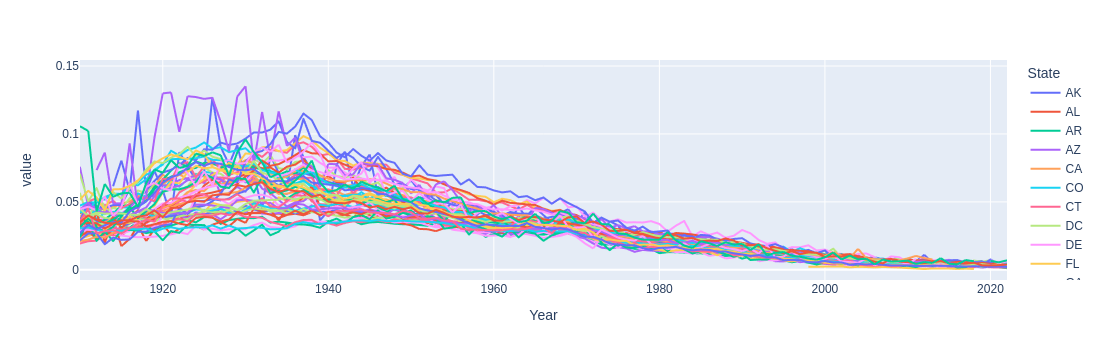

In [176]:
states['Count_Normalized'] = states['Count'] / states['Total']
state_counts = (
    states.query('Sex == "M" and Name == "Robert"')
    .set_index(['Year', 'State'])['Count_Normalized']
    .unstack()
)
px.line(state_counts)

In [177]:
states

State Sex  Year     Name  Count  Total  Count_Normalized
0          MO   F  1910     Mary    611  10929          0.055906
1          MO   F  1910    Helen    313  10929          0.028639
2          MO   F  1910  Dorothy    270  10929          0.024705
3          MO   F  1910  Mildred    267  10929          0.024430
4          MO   F  1910     Ruth    237  10929          0.021685
...       ...  ..   ...      ...    ...    ...               ...
6434920    PR   M  2022   Yariel      5   6628          0.000754
6434921    PR   M  2022   Yasiel      5   6628          0.000754
6434922    PR   M  2022   Yeiden      5   6628          0.000754
6434923    PR   M  2022    Yeray      5   6628          0.000754
6434924    PR   M  2022   Zuriel      5   6628          0.000754

[6434925 rows x 7 columns]

In [178]:
states.query('State == "CA" and Name == "Paola"').reset_index()

index State Sex  Year   Name  Count   Total  Count_Normalized
0    949537    CA   F  1967  Paola      5  152926          0.000033
1    952921    CA   F  1969  Paola      9  159859          0.000056
2    957418    CA   F  1971  Paola      7  148402          0.000047
3    959508    CA   F  1972  Paola      7  137072          0.000051
4    961394    CA   F  1973  Paola      8  130787          0.000061
5    963391    CA   F  1974  Paola      9  136615          0.000066
6    965130    CA   F  1975  Paola     16  138449          0.000116
7    967784    CA   F  1976  Paola      9  143868          0.000063
8    969416    CA   F  1977  Paola     23  149568          0.000154
9    971595    CA   F  1978  Paola     34  153325          0.000222
10   974154    CA   F  1979  Paola     27  163328          0.000165
11   976805    CA   F  1980  Paola     22  173707          0.000127
12   979085    CA   F  1981  Paola     48  181281          0.000265
13   981986    CA   F  1982  Paola     29  185734          0.000156
14   984322    CA   F  1983  Paola     84  187701          0.000448
15   987083    CA   F  1984  Paola     72  192587          0.000374
16   989886    CA   F  1985  Paola     72  202231          0.000356
17   992761    CA   F  1986  Paola     81  207672          0.000390
18   995823    CA   F  1987  Paola     86  215093          0.000400
19   998926    CA   F  1988  Paola     86  228401          0.000377
20  1002184    CA   F  1989  Paola    113  243982          0.000463
21  1005654    CA   F  1990  Paola    161  262411          0.000614
22  1009434    CA   F  1991  Paola    138  261491          0.000528
23  1013026    CA   F  1992  Paola    229  256772          0.000892
24  1016864    CA   F  1993  Paola    144  249575          0.000577
25  1020467    CA   F  1994  Paola    324  242473          0.001336
26  1024092    CA   F  1995  Paola    401  234577          0.001709
27  1027744    CA   F  1996  Paola    287  229761          0.001249
28  1031312    CA   F  1997  Paola    259  222834          0.001162
29  1034802    CA   F  1998  Paola    298  220996          0.001348
30  1038307    CA   F  1999  Paola    395  219051          0.001803
31  1041917    CA   F  2000  Paola    341  223800          0.001524
32  1045687    CA   F  2001  Paola    330  222267          0.001485
33  1049483    CA   F  2002  Paola    311  222707          0.001396
34  1053347    CA   F  2003  Paola    302  226633          0.001333
35  1057280    CA   F  2004  Paola    249  228796          0.001088
36  1061299    CA   F  2005  Paola    276  230384          0.001198
37  1065383    CA   F  2006  Paola    319  234720          0.001359
38  1069624    CA   F  2007  Paola    256  236200          0.001084
39  1073882    CA   F  2008  Paola    281  229264          0.001226
40  1078158    CA   F  2009  Paola    228  218231          0.001045
41  1082387    CA   F  2010  Paola    190  210913          0.000901
42  1086510    CA   F  2011  Paola    167  207545          0.000805
43  1090573    CA   F  2012  Paola    131  209001          0.000627
44  1094745    CA   F  2013  Paola    103  205030          0.000502
45  1098733    CA   F  2014  Paola    100  209515          0.000477
46  1102798    CA   F  2015  Paola     86  205193          0.000419
47  1106811    CA   F  2016  Paola     75  203531          0.000368
48  1110616    CA   F  2017  Paola     83  195567          0.000424
49  1114476    CA   F  2018  Paola     66  189208          0.000349
50  1118273    CA   F  2019  Paola     53  184228          0.000288
51  1121930    CA   F  2020  Paola     51  173763          0.000294
52  1125589    CA   F  2021  Paola     48  173913          0.000276
53  1129279    CA   F  2022  Paola     47  172454          0.000273
54  1199237    CA   M  1984  Paola      5  212374          0.000024
55  1209322    CA   M  1989  Paola      8  268633          0.000030
56  1214495    CA   M  1991  Paola      7  287826          0.000024
57  1222142    CA   M  1994  Paola      7  266829          0.0

In [179]:
#states.to_csv('/home/n-3331/Documents/Datasets/Babay_Names/By_States.csv')

# Heatmap of Name Popularity

In [221]:
def heatmap_states(states, name, sex, cmap='Reds'):
    state_counts = (
        states.query('Sex == @sex and Name == @name')
        .set_index(['Year', 'State'])['Count_Normalized']
        .unstack())
    
    max_years = {}
    for c in state_counts.columns:
        max_years[c] = state_counts.index[state_counts[c].argmax()]
    state_counts_sorted = state_counts[pd.Series(max_years).sort_values().index]
    state_counts_sorted = state_counts_sorted.fillna(0)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_title(name)
    sns.heatmap(state_counts_sorted.T, cmap=cmap)
    plt.show()

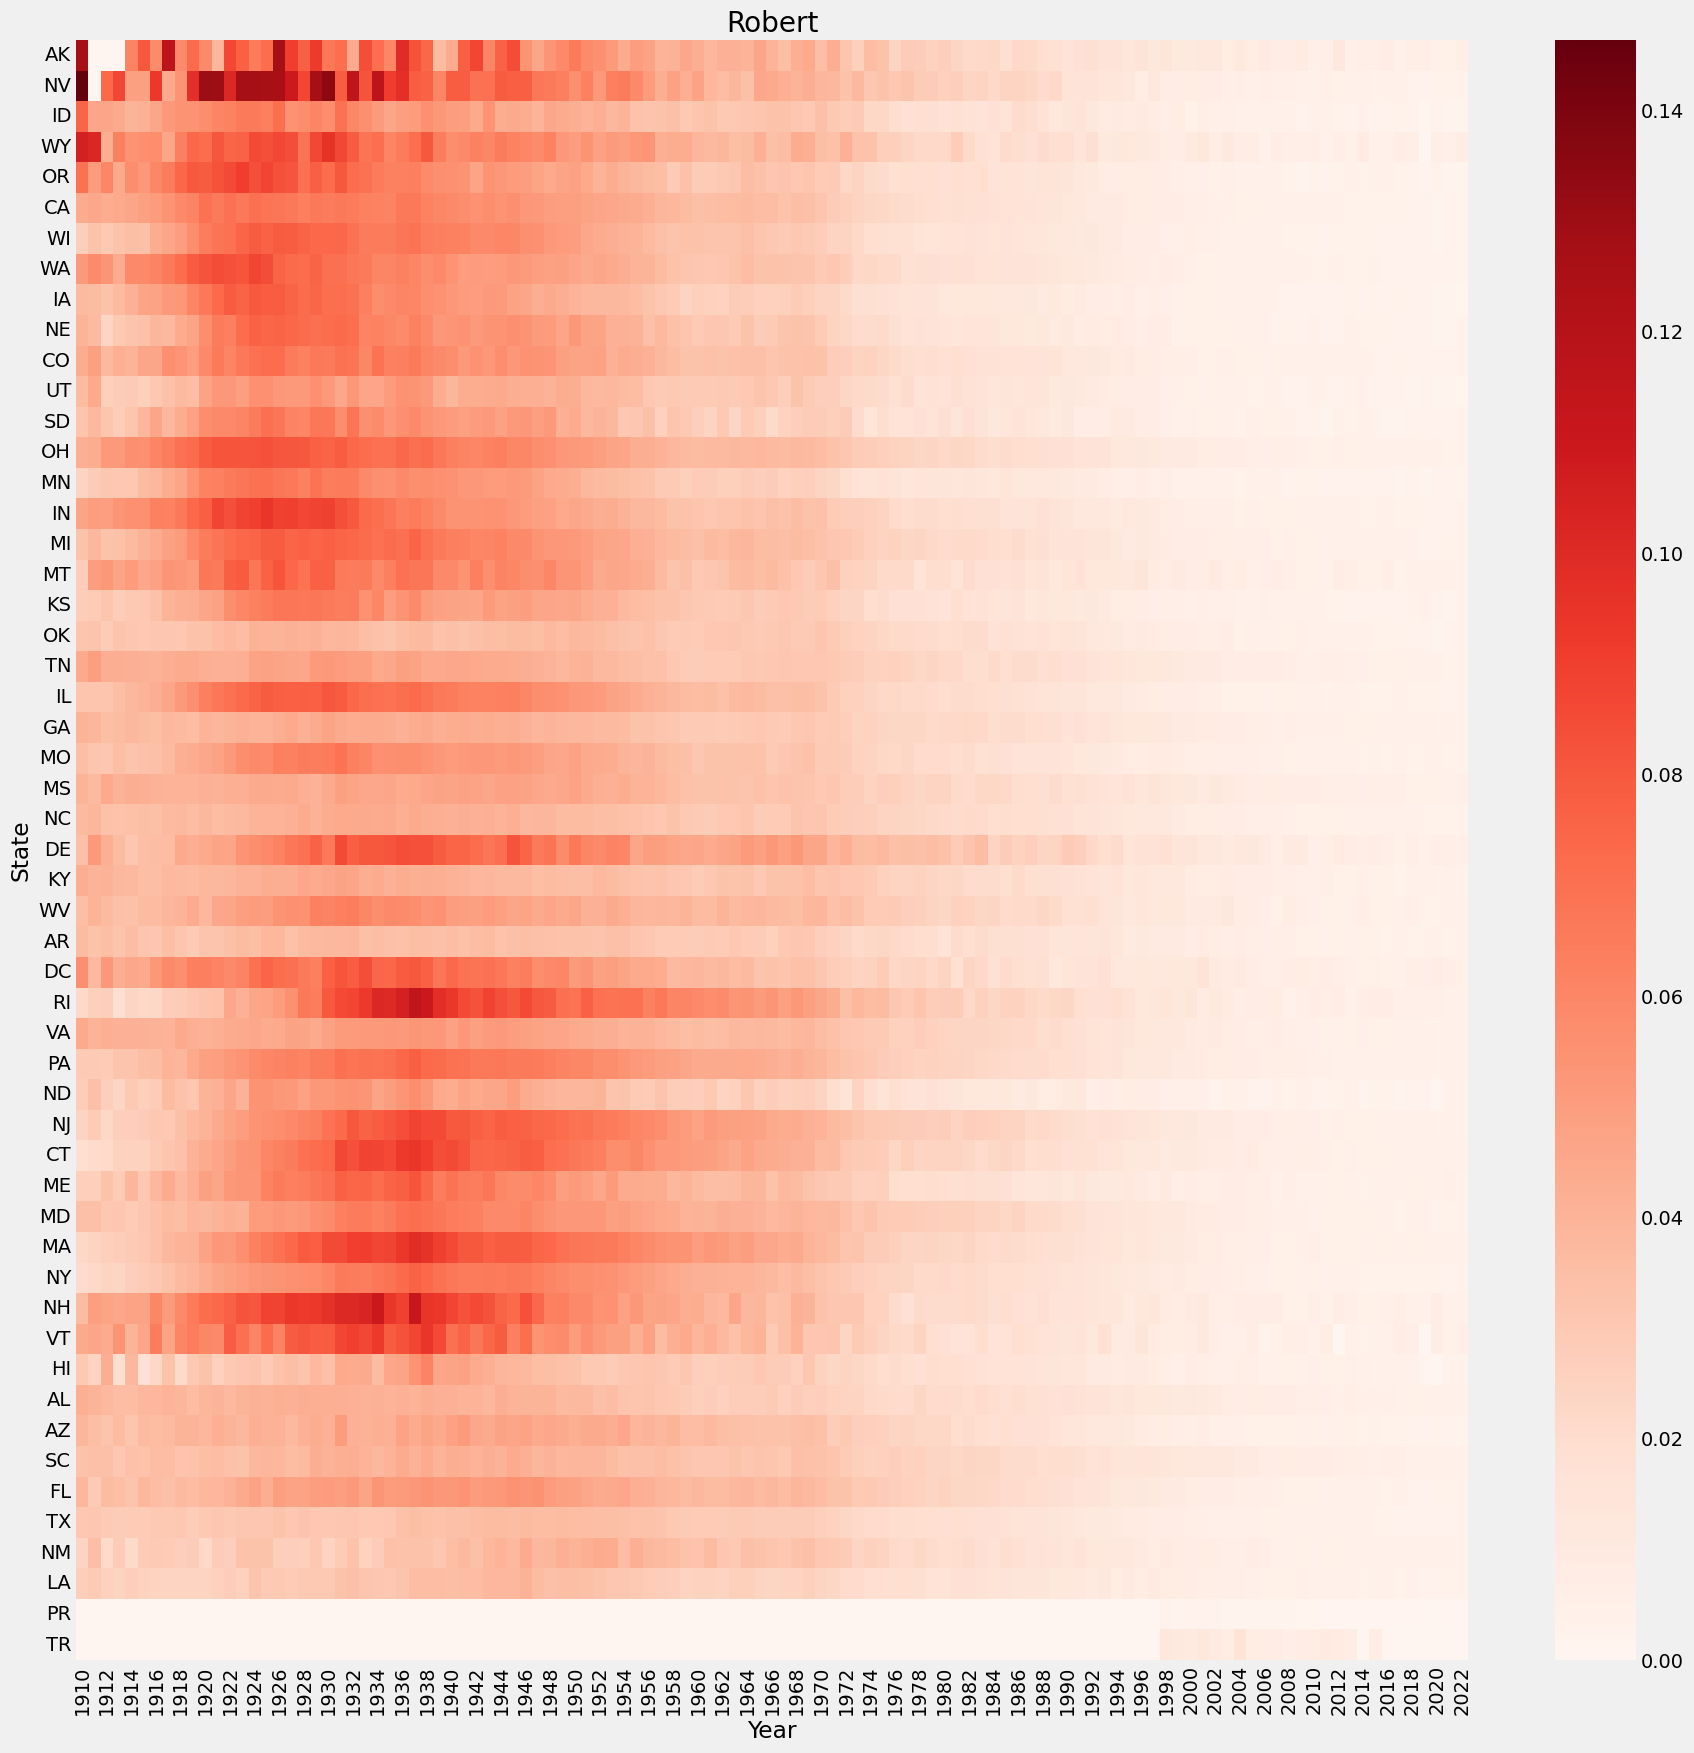

In [222]:
heatmap_states(states, name = 'Robert', sex = 'M')

In [182]:
state_counts

State        AK        AL        AR        AZ        CA        CO        CT  \
Year                                                                          
1910   0.127660  0.042021  0.036551  0.038934  0.043884  0.043058  0.019403   
1911        NaN  0.039694  0.032967  0.035242  0.045253  0.048967  0.021064   
1912        NaN  0.037634  0.034886  0.032503  0.042987  0.037220  0.021480   
1913        NaN  0.035576  0.032581  0.036069  0.045144  0.041956  0.025691   
1914   0.061538  0.035976  0.035949  0.032005  0.045916  0.040544  0.025476   
...         ...       ...       ...       ...       ...       ...       ...   
2018   0.006500  0.004694  0.003038  0.003312  0.002774  0.002833  0.004326   
2019   0.006549  0.004996  0.003093  0.002640  0.002584  0.002910  0.003554   
2020   0.003970  0.004052  0.003785  0.003016  0.002247  0.002714  0.003898   
2021   0.005124  0.003832  0.003254  0.002437  0.002512  0.002446  0.003800   
2022   0.006740  0.003882  0.003610  0.002200  0.002154  0.002368  0.003594   

State        DC        DE        FL  ...        TN  TR        TX        UT  \
Year                                 ...                                     
1910   0.056250  0.034826  0.038655  ...  0.044555 NaN  0.030417  0.036117   
1911   0.037500  0.051852  0.029254  ...  0.049297 NaN  0.031134  0.044610   
1912   0.052288  0.041876  0.036114  ...  0.042835 NaN  0.029532  0.026850   
1913   0.042772  0.036111  0.035169  ...  0.042372 NaN  0.028182  0.028443   
1914   0.045515  0.031425  0.032122  ...  0.041873 NaN  0.028744  0.029250   
...         ...       ...       ...  ...       ...  ..       ...       ...   
2018   0.006841  0.006221  0.003156  ...  0.003699 NaN  0.002668  0.002003   
2019   0.005892  0.003712  0.002844  ...  0.003990 NaN  0.002641  0.002742   
2020   0.007205  0.005844  0.002867  ...  0.003656 NaN  0.002529  0.001871   
2021   0.005372  0.005960  0.002887  ...  0.003391 NaN  0.002467  0.001829   
2022   0.004894  0.005370  0.002480  ...  0.003313 NaN  0.002290  0.001702   

State        VA        VT        WA        WI        WV        WY  
Year                                                               
1910   0.044838  0.044610  0.051809  0.027083  0.035000  0.105691  
1911   0.039497  0.046512  0.058156  0.033064  0.040000  0.102190  
1912   0.042209  0.043722  0.053273  0.029772  0.036911  0.042813  
1913   0.041278  0.054126  0.043752  0.032840  0.034568  0.063232  
1914   0.041499  0.039526  0.059231  0.035258  0.034101  0.053763  
...         ...       ...       ...       ...       ...       ...  
2018   0.003759  0.006048  0.002639  0.002649  0.005195  0.006307  
2019   0.004234       NaN  0.002704  0.002478  0.003289       NaN  
2020   0.003369  0.006955  0.002476  0.002262  0.003328  0.006623  
2021   0.003898  0.005084  0.002580  0.002433  0.003449  0.005521  
2022   0.003783  0.006135  0.001963  0.002087  0.003935  0.007011  

[113 rows x 53 columns]

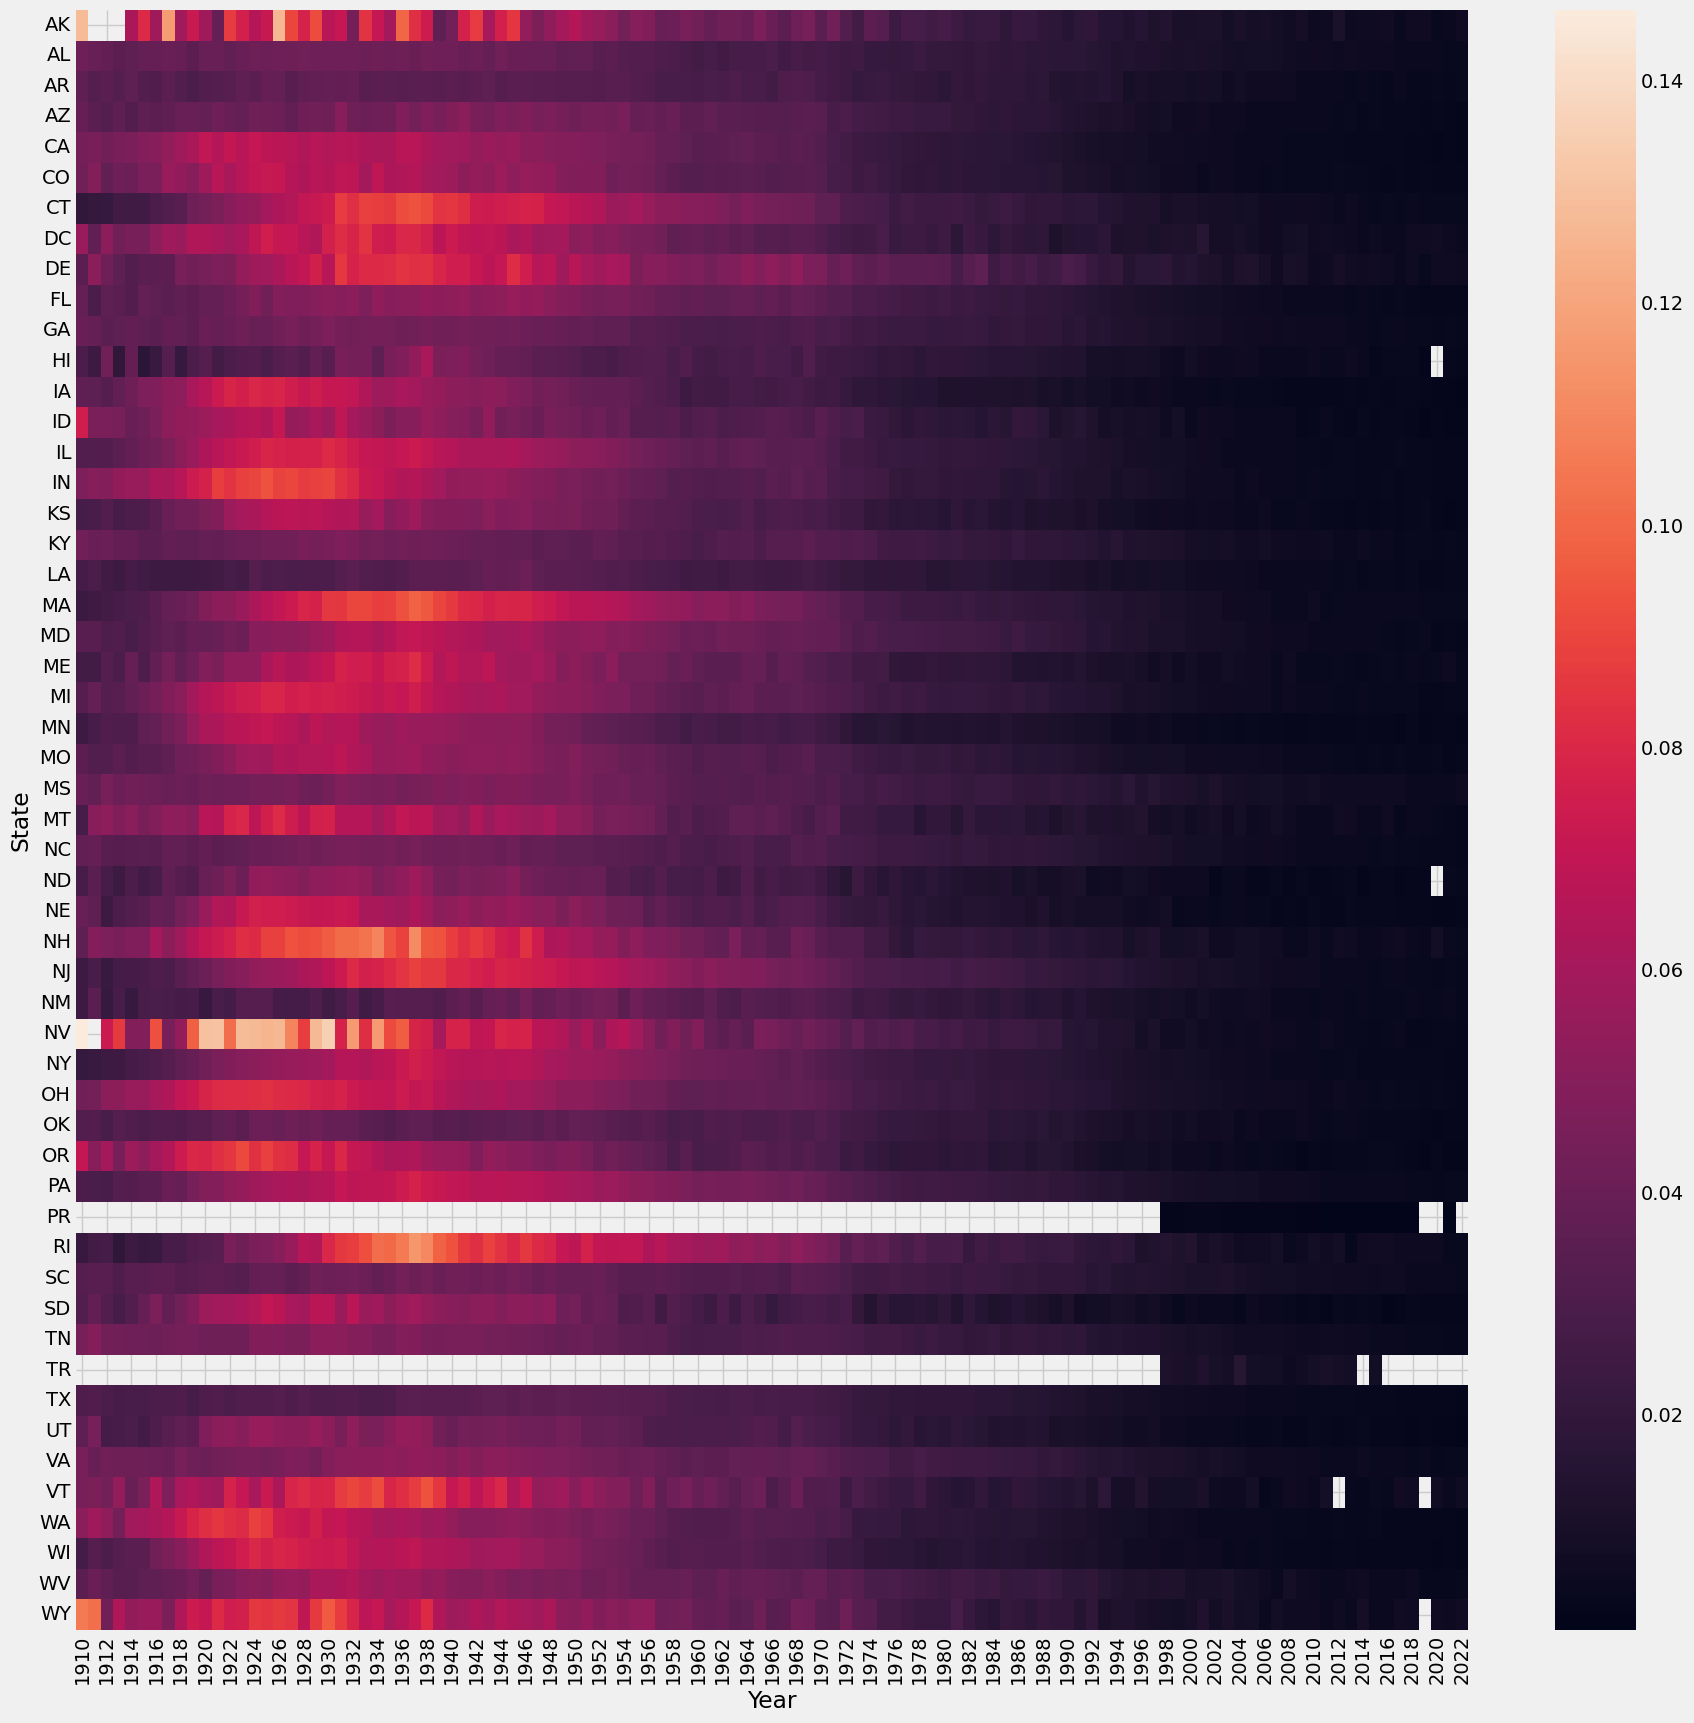

In [183]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(state_counts.T)
plt.show()

In [184]:
# state_counts['MD'].sort_values()

In [185]:
max_years = {}
for c in state_counts.columns:
    max_years[c] = state_counts.index[state_counts[c].argmax()]

In [186]:
# pd.Series(max_years).sort_index().index

In [198]:
pd.Series(max_years).sort_values()

AK    1910
NV    1910
ID    1910
WY    1910
OR    1923
CA    1924
WI    1924
WA    1924
IA    1924
NE    1924
CO    1925
UT    1925
SD    1925
OH    1925
MN    1925
IN    1925
MI    1926
MT    1926
KS    1927
OK    1927
TN    1930
IL    1930
GA    1930
MO    1931
MS    1931
NC    1931
DE    1931
KY    1931
WV    1932
AR    1932
DC    1933
RI    1937
VA    1937
PA    1937
ND    1937
NJ    1937
CT    1937
ME    1937
MD    1937
MA    1937
NY    1937
NH    1937
VT    1938
HI    1938
AL    1938
AZ    1941
SC    1945
FL    1945
TX    1946
NM    1946
LA    1946
PR    2002
TR    2004
dtype: int64

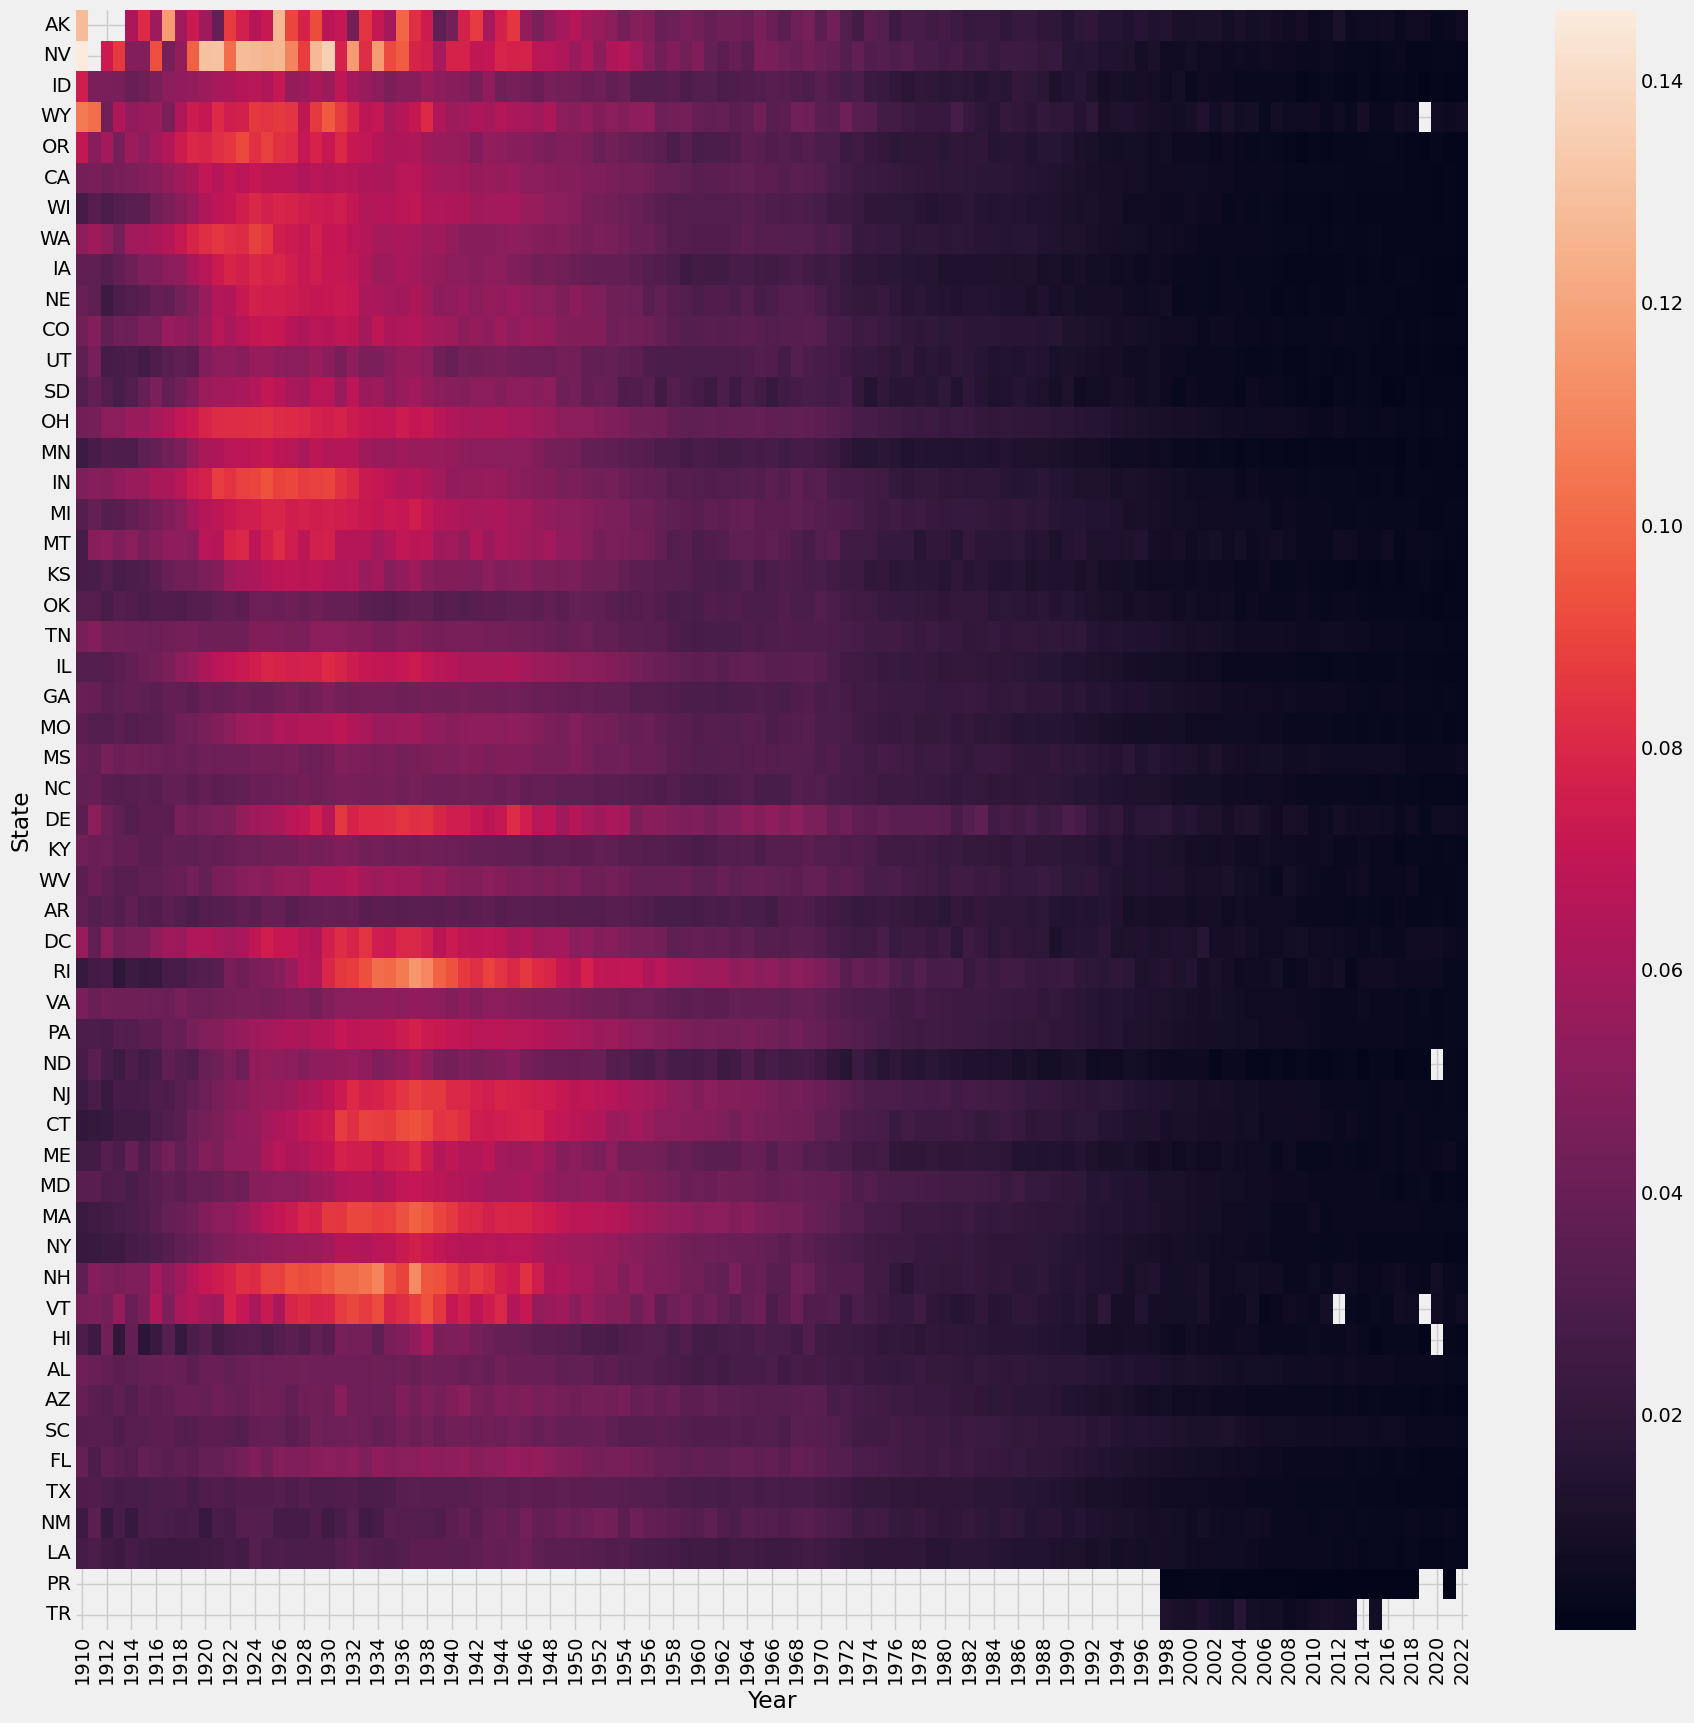

In [188]:
state_counts_sorted = state_counts[pd.Series(max_years).sort_values().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(state_counts_sorted.T)
plt.show()

In [189]:
# states.query('State == "WY" and Name == "Delilah"')

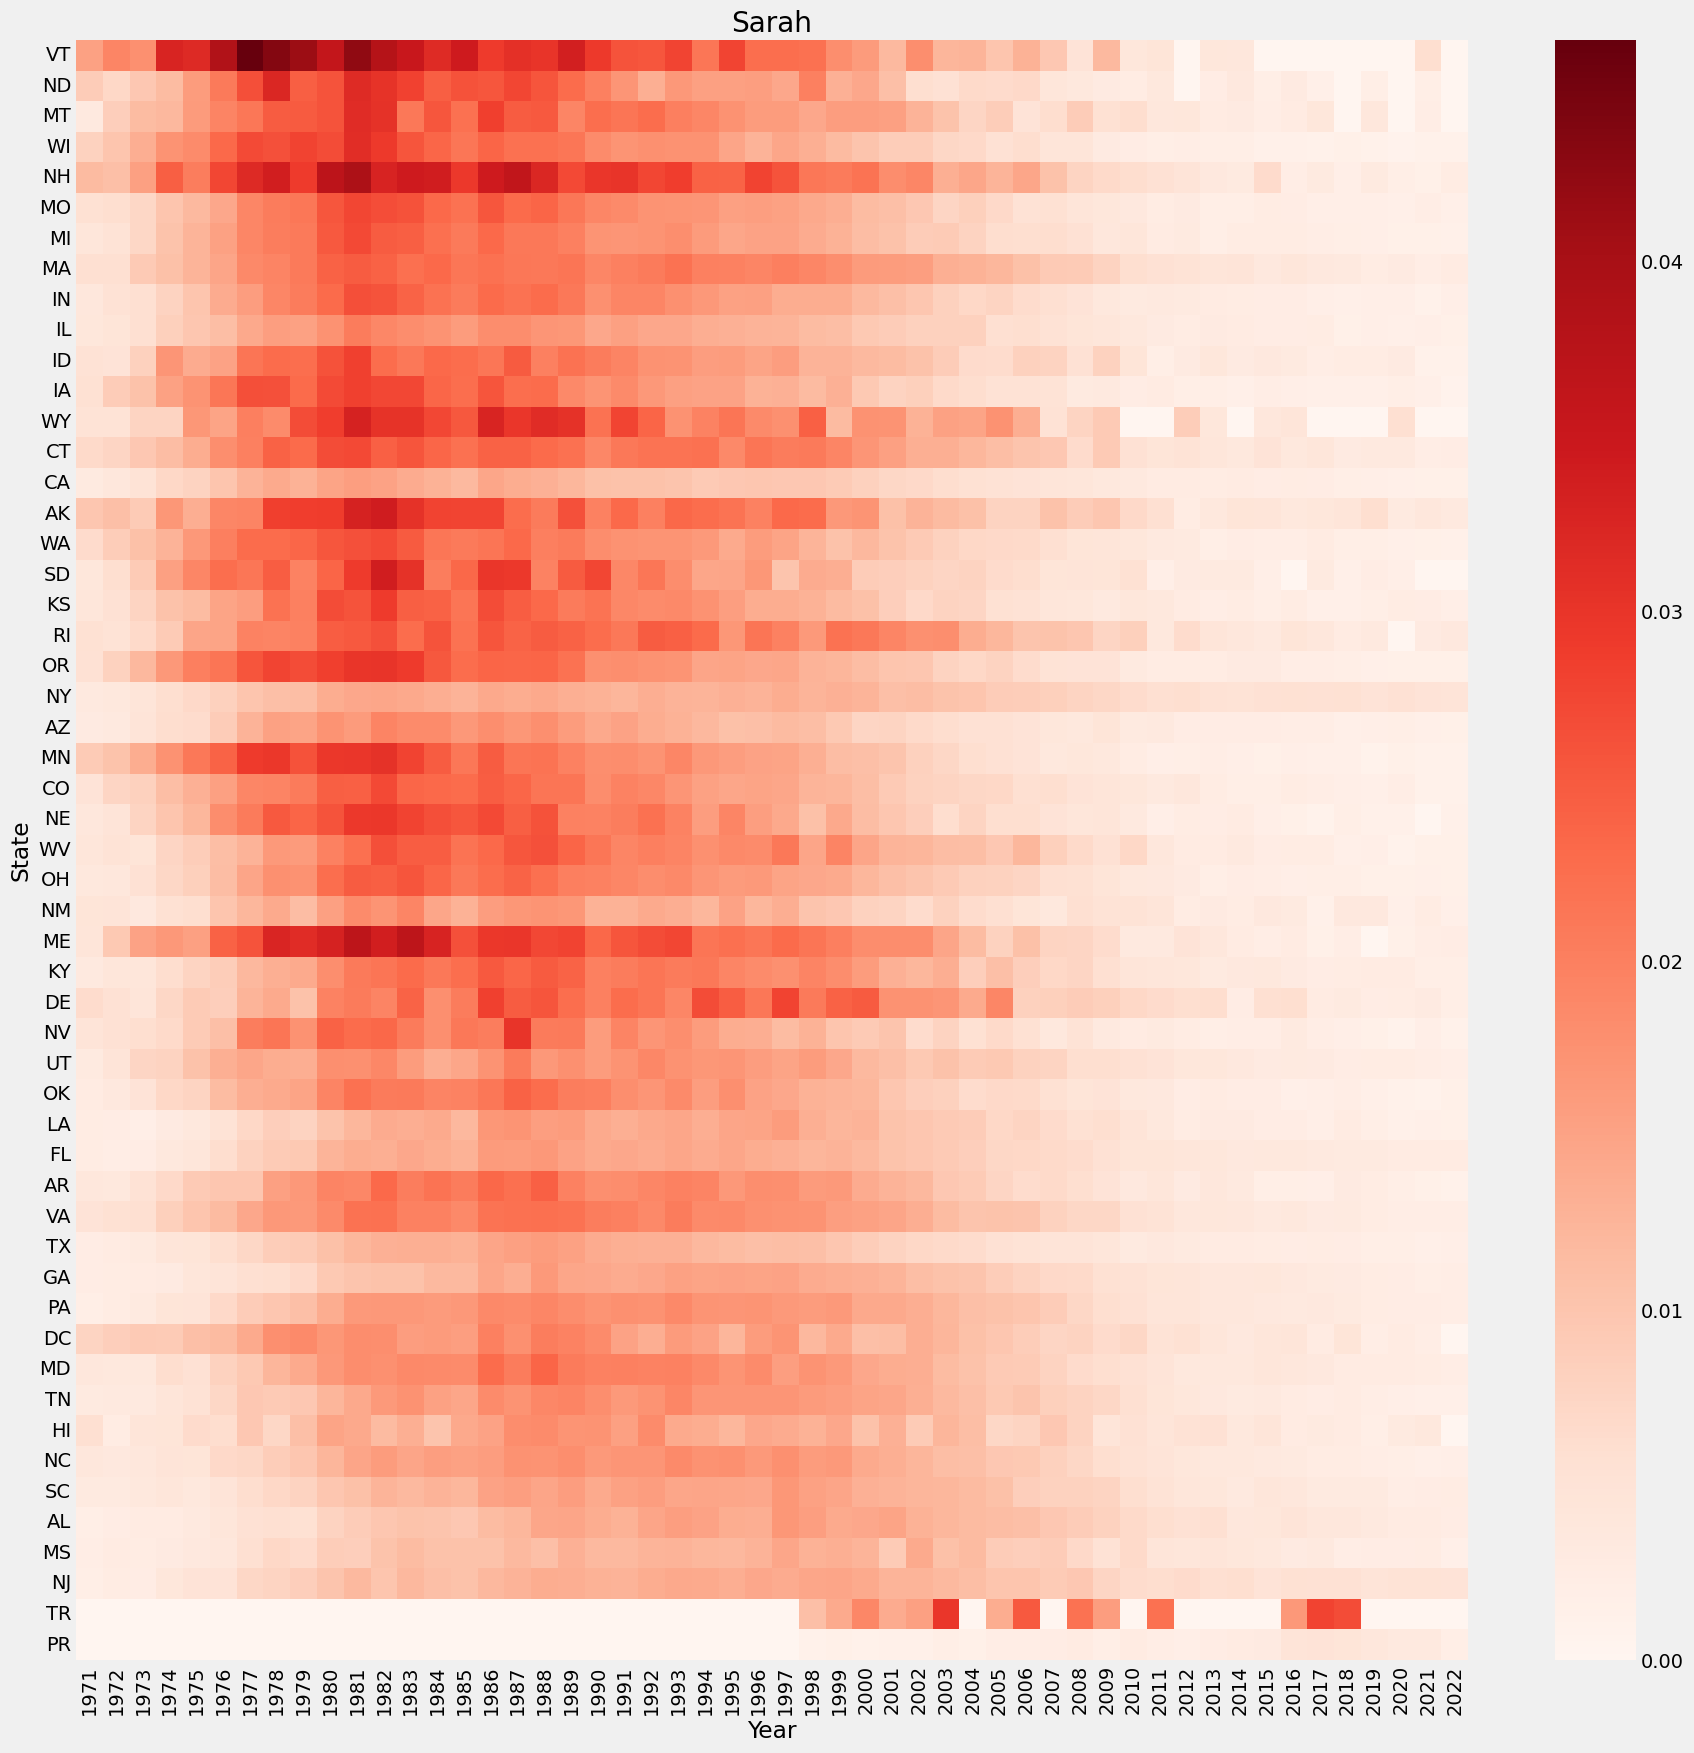

In [223]:
heatmap_states(states.query('Year >1970'), name = 'Sarah', sex = 'F')  ## calling heatmap_states function

In [193]:
# states.to_csv('/home/n-3331/Documents/Datasets/Babay_Names/namesbystate/namesbystate.csv', index=False)

In [229]:
states.query('Sex == "M"').sort_values('Count', ascending=False)['Name'].unique()[:10]

array(['Robert', 'John', 'Michael', 'David', 'James', 'Richard',
       'Christopher', 'William', 'Daniel', 'Mark'], dtype=object)

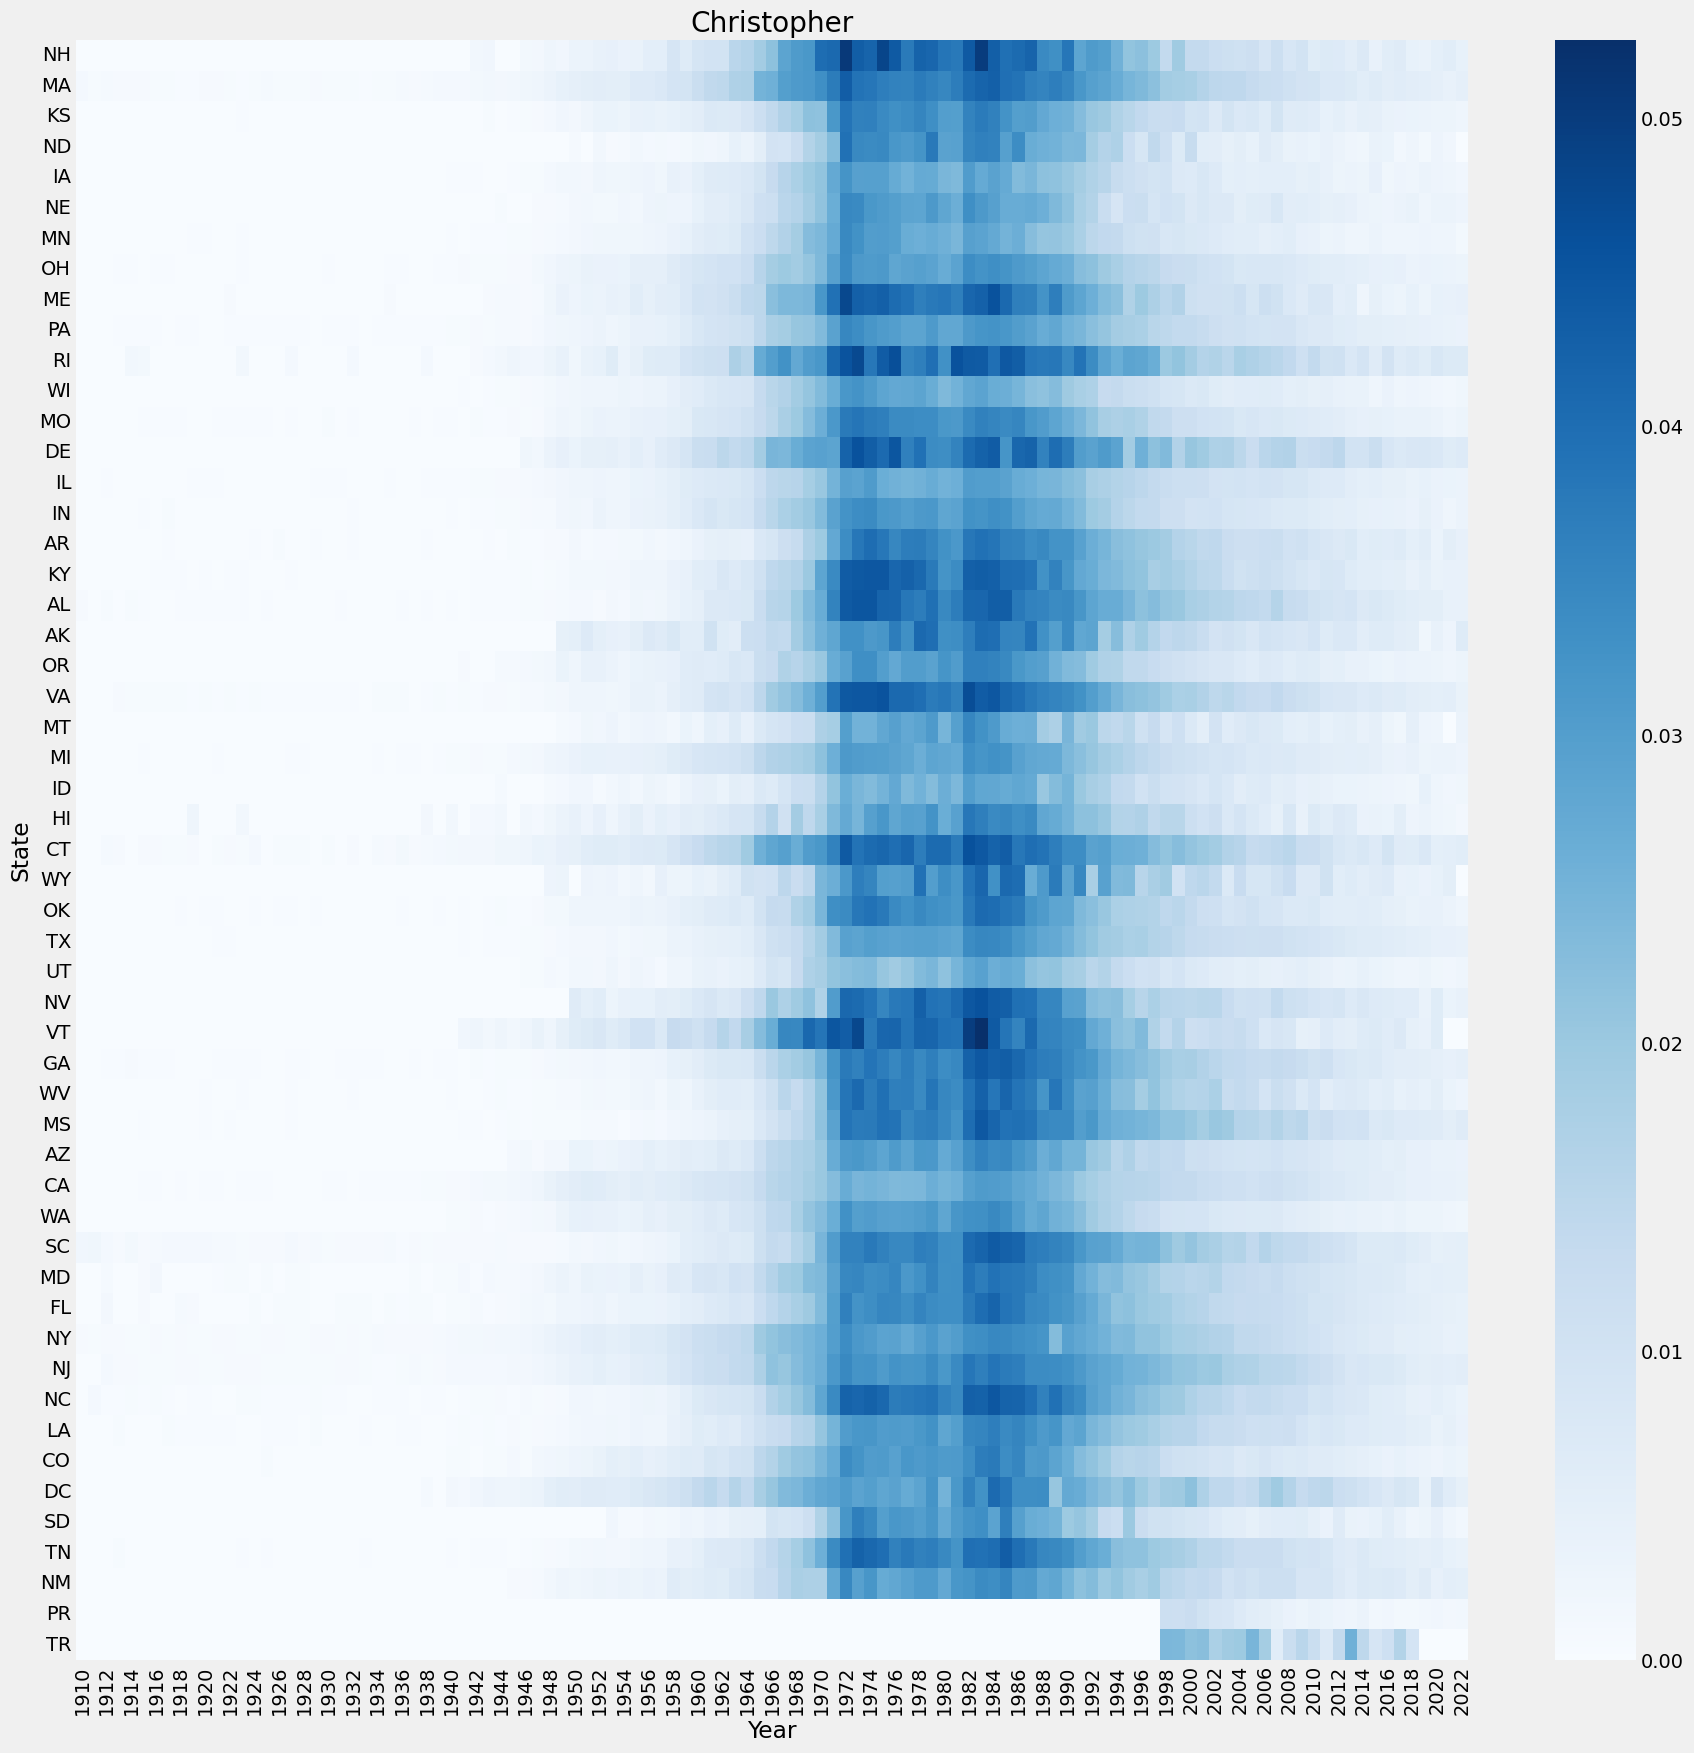

In [232]:
heatmap_states(states, name = 'Christopher', sex = 'M', cmap='Blues')  ## calling heatmap_states function

# Change in Popularity By Year

In [253]:
df = pd.read_csv('/home/n-3331/Documents/Datasets/Babay_Names/names/names.csv')
df['Delta'] = df.sort_values('Year').groupby(['Name','Sex'])['Count'].diff()

In [254]:
df['Change'] = df['Delta'] / df['Count']

In [261]:
df.query('Count > 10').dropna(subset=['Delta']).sort_values('Change')

Name Sex  Count  Year   Delta     Change
603208   Elizabet   F     36  1990  -409.0 -11.361111
1675950    Bethzy   F     28  2007  -273.0  -9.750000
675473    Unnamed   F     12  1992   -91.0  -7.583333
1518277   Aideliz   F     11  2009   -80.0  -7.272727
592732     Hannah   M     13  2005   -90.0  -6.923077
...           ...  ..    ...   ...     ...        ...
192056    Omarion   M    418  2002   413.0   0.988038
1178495    Catina   F   1371  1972  1357.0   0.989788
418       Tabatha   F    500  1966   495.0   0.990000
1671435   Jaslene   F    501  2007   496.0   0.990020
794447      Nakia   F   1135  1974  1128.0   0.993833

[1118248 rows x 6 columns]

In [262]:
df.query('Name == "Elizabet" and Year > 1980').sort_values('Year')

Name Sex  Count  Year  Delta     Change
1625805  Elizabet   F     29  1981    6.0   0.206897
1441872  Elizabet   F     26  1982   -3.0  -0.115385
739200   Elizabet   F     18  1983   -8.0  -0.444444
1800033  Elizabet   F     11  1984   -7.0  -0.636364
1146345  Elizabet   F     25  1985   14.0   0.560000
1985741  Elizabet   F     30  1986    5.0   0.166667
423327   Elizabet   F     20  1987  -10.0  -0.500000
717196   Elizabet   F     19  1988   -1.0  -0.052632
754977   Elizabet   F    445  1989  426.0   0.957303
603208   Elizabet   F     36  1990 -409.0 -11.361111
1945318  Elizabet   F     46  1991   10.0   0.217391
671786   Elizabet   F     28  1992  -18.0  -0.642857
1064623  Elizabet   F     41  1993   13.0   0.317073
1485233  Elizabet   F     40  1994   -1.0  -0.025000
1816276  Elizabet   F     44  1995    4.0   0.090909
460614   Elizabet   F     47  1996    3.0   0.063830
1260065  Elizabet   F     38  1997   -9.0  -0.236842
1117149  Elizabet   F     20  1998  -18.0  -0.900000
1645337  Elizabet   F     43  1999   23.0   0.534884
1757240  Elizabet   F     34  2000   -9.0  -0.264706
1412049  Elizabet   F     35  2001    1.0   0.028571
177972   Elizabet   F     27  2002   -8.0  -0.296296
900302   Elizabet   F     38  2003   11.0   0.289474
1306945  Elizabet   F     32  2004   -6.0  -0.187500
571845   Elizabet   F     32  2005    0.0   0.000000
972757   Elizabet   F     27  2006   -5.0  -0.185185
1676998  Elizabet   F     22  2007   -5.0  -0.227273
1864665  Elizabet   F     32  2008   10.0   0.312500
1512881  Elizabet   F     32  2009    0.0   0.000000
1218814  Elizabet   F     24  2010   -8.0  -0.333333
262547   Elizabet   F     22  2011   -2.0  -0.090909
631507   Elizabet   F     19  2012   -3.0  -0.157895
1560244  Elizabet   F     11  2013   -8.0  -0.727273
551560   Elizabet   F      5  2014   -6.0  -1.200000
21826    Elizabet   F     11  2015    6.0   0.545455
387217   Elizabet   F     10  2016   -1.0  -0.100000
863798   Elizabet   F      6  2017   -4.0  -0.666667
1021262  Elizabet   F     10  2020    4.0   0.400000
1721707  Elizabet   F      5  2021   -5.0  -1.000000

<Axes: xlabel='Year'>

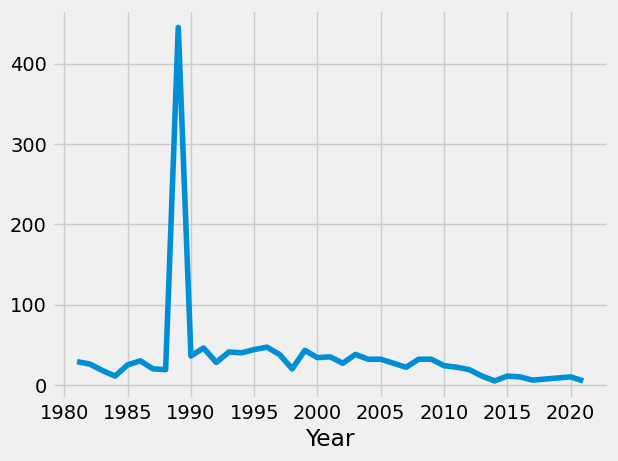

In [263]:
df.query('Name == "Elizabet" and Year > 1980').set_index('Year').sort_index()['Count'].plot()

In [264]:
df.query('Count > 10').dropna(subset=['Delta']).sort_values('Change').tail(20)

Name Sex  Count  Year   Delta    Change
755318   Audriana   F    214  1989   208.0  0.971963
1794773   Santana   F    214  1984   208.0  0.971963
32198      Jonael   M    232  2015   226.0  0.974138
1188347    Demond   M    403  1972   393.0  0.975186
683975      Jalen   M    612  1992   597.0  0.975490
1062601   Coraima   F    221  1993   216.0  0.977376
645       Tamatha   F    222  1966   217.0  0.977477
615727      Tevin   M    607  1990   594.0  0.978583
769557   Alexande   M    301  1989   295.0  0.980066
1426725    Jaheim   M    554  2001   544.0  0.981949
2015144     Lavar   M    279  1977   274.0  0.982079
2003928    Kizzie   F    286  1977   281.0  0.982517
1482490   Aaliyah   F   1451  1994  1429.0  0.984838
968337    Akeelah   F    403  2006   397.0  0.985112
1470107    Deneen   F   1604  1964  1582.0  0.986284
192056    Omarion   M    418  2002   413.0  0.988038
1178495    Catina   F   1371  1972  1357.0  0.989788
418       Tabatha   F    500  1966   495.0  0.990000
1671435   Jaslene   F    501  2007   496.0  0.990020
794447      Nakia   F   1135  1974  1128.0  0.993833

<Axes: xlabel='Year'>

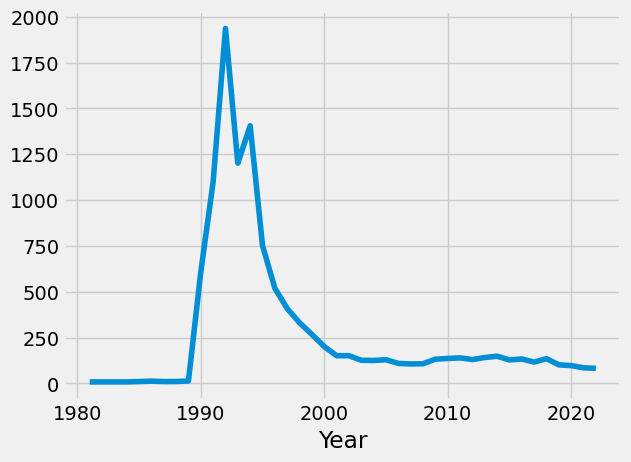

In [265]:
df.query('Name == "Tevin" and Year > 1980 and Sex == "M"').set_index('Year').sort_index()['Count'].plot()

In [2]:
import sys

print(sys.executable)

/home/n-3331/Documents/Python_Practice/PY_DS/bin/python3


In [1]:
from sentence_transformers import SentenceTransformer

/home/n-3331/Documents/Python_Practice/PY_DS/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer(model_name_or_path='all-MiniLM-L12-v2')

# Encode the sentence 'Hello world'
embedding_hello_world = model.encode(['Hello world'])

# Print the resulting numerical vector
print(embedding_hello_world)

.gitattributes: 100%|██████████████████████| 1.18k/1.18k [00:00<00:00, 3.14MB/s]
1_Pooling/config.json: 100%|████████████████████| 190/190 [00:00<00:00, 857kB/s]
README.md: 100%|███████████████████████████| 10.6k/10.6k [00:00<00:00, 40.4MB/s]
config_sentence_transformers.json: 100%|████████| 116/116 [00:00<00:00, 531kB/s]
data_config.json: 100%|████████████████████| 39.3k/39.3k [00:00<00:00, 2.00MB/s]
pytorch_model.bin: 100%|█████████████████████| 134M/134M [00:10<00:00, 12.4MB/s]
sentence_bert_config.json: 100%|██████████████| 53.0/53.0 [00:00<00:00, 409kB/s]
special_tokens_map.json: 100%|██████████████████| 112/112 [00:00<00:00, 870kB/s]
tokenizer.json: 100%|████████████████████████| 466k/466k [00:00<00:00, 6.13MB/s]
tokenizer_config.json: 100%|███████████████████| 352/352 [00:00<00:00, 2.73MB/s]
train_script.py: 100%|█████████████████████| 13.2k/13.2k [00:00<00:00, 10.7MB/s]
vocab.txt: 100%|██████████████████████████████| 232k/232k [00:00<00:00, 627kB/s]
modules.json: 100%|█████████

[[-7.59731606e-02 -5.26198233e-03  1.14563359e-02 -6.79846406e-02
  -3.06893070e-03 -1.83623329e-01  6.59924075e-02  2.94692796e-02
  -5.32360263e-02  8.21525827e-02 -6.86672330e-03 -4.10007574e-02
   4.59067598e-02 -2.87877675e-02 -5.51802032e-02 -2.37009116e-02
   7.20980391e-02 -2.71504186e-02 -8.29811469e-02 -7.92837366e-02
  -4.75655273e-02  1.51742492e-02 -1.09389283e-01 -1.28033971e-02
  -3.36131528e-02 -4.57370654e-02  2.34418567e-02  2.27759667e-02
   7.21520036e-02 -5.90885840e-02  1.32416179e-02  1.77258700e-02
   1.23955533e-01  1.30774977e-03 -5.11901081e-02  4.55828011e-03
   3.87475900e-02 -3.25694717e-02 -1.15961600e-02  8.32073167e-02
   1.98598001e-02  1.46335699e-02 -3.38600092e-02  4.03792784e-02
   2.94018090e-02 -7.89092481e-02 -6.96874922e-03 -3.68897505e-02
   3.54535431e-02 -8.12935829e-02 -4.07067779e-03 -5.25939353e-02
   3.55004668e-02 -7.72121921e-03  7.02210292e-02 -1.64805576e-02
  -1.05443597e-02  4.38455045e-02  1.11308349e-02 -1.15876906e-02
  -2.53539